<a href="https://colab.research.google.com/github/Valeeew/Data_management_of_an_online_store/blob/master/Data_management_of_an_online_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Management & Optimisation d'une boutique en ligne
## Par Valentin MONTEIRO 
---
### Sommaire
> ### IMPORT
- [Import des library](#scrollTo=tAgUgPb2dUt3&line=1&uniqifier=1)
- [Import des DATA](#scrollTo=LGGkJyQgd2Vc&line=3&uniqifier=1)
- Traitement des DATA
>> - [df_web](#scrollTo=THwlX1u91f2t&line=4&uniqifier=1)
>> - [df_liaison](#scrollTo=ykl7KSWzVFsA&line=1&uniqifier=1)❓
- [Lexique des données](#scrollTo=oG89DAzeosCW&line=1&uniqifier=1)

> ### Objectifs
- [Objectifs](#scrollTo=zVQGfyVrRI86&line=15&uniqifier=1)

> ### Code
>> - [Rapprocher les 2 exports](#scrollTo=VpQfY-tkWMYh&line=2&uniqifier=1)
>> - [Calcul CA (turnover) par produit](#scrollTo=nGntr2d-xQYs&line=1&uniqifier=1)
>> - [Calcul du CA (turnover) des ventes en ligne](#scrollTo=dwOAg5jrtGl2&line=1&uniqifier=1)



## IMPORT

---
> ### Import des Libraries
---



In [1]:
import pandas as pd
import matplotlib.pyplot as plt

---
> ### Import des DATA from Github
---




In [2]:
# Clone the entire repo & import DATA
!git clone -l -s git://github.com/Valeeew/Data_management_of_an_online_store cloned-repo
%cd cloned-repo
!ls

# Enregistrement des DATA dans les DATAframe
df_erp = pd.read_excel("erp.xlsx")
df_liaison = pd.read_excel("liaison.xlsx")
df_web = pd.read_excel("web.xlsx")

Cloning into 'cloned-repo'...
remote: Enumerating objects: 21, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 21 (delta 11), reused 4 (delta 1), pack-reused 0
Receiving objects: 100% (21/21), 349.42 KiB | 1.23 MiB/s, done.
Resolving deltas: 100% (11/11), done.
/content/cloned-repo
Data_management_of_an_online_store.ipynb  erp.xlsx  liaison.xlsx  web.xlsx


---
> ### Traitement des DATA
---




#### df_web

In [3]:
# Traitement des données web inutiles
df_web = df_web.drop(["virtual","downloadable","rating_count","average_rating","tax_class","post_content","comment_status","ping_status","post_password","post_content_filtered","post_parent","menu_order","comment_count"], axis = 1)
# Remplacement des données NaN dans df_web.total_sales
df_web.total_sales = df_web.total_sales.fillna(0)
# Remplacement des données tax_status ➡️ taxable = 1 et Nan = 0
df_web = df_web[df_web.tax_status.notnull()]
#df_web.tax_status = df_web.tax_status.replace("taxable",1)

#### df_liaison

In [4]:
#Suppression des valeurs NaN dans id_web ❓
#df_liaison = df_liaison[df_liaison.id_web.notnull()]

---
> ### Lexique des données
---





#### df_erp

| Variable | Description | Type | PK |
| :--------------- |:---------------| :-----| :---|
| product_id | références produit | int | ✅ |
| onsale_web | vendu en ligne | boolean ||
| price | prix de vente | float ||
| stock_quantity | quantité dans le stock | int ||
|stock_status | État de stock | str ||

#### df_web

| Variable | Description | Type | PK |
| :--------------- |:---------------| :-----| :---|
| sku | références produit | int | ✅ |
| total_sales | nombre de vente | Int ||
| tax_status | produit taxable ou non | Boolean ||
| post_author | auteur de l'article | int ||
| post_date | Date de publication | date ||
| post_date_gmt | Date de publication h GMT| date ||
| post_title | titre de l'article | str ||
| post_excerpt | description de l'article | str ||
| post_status | statut de l'article | str ||
| post_name | Nom de l'article | str ||
| post_modified | Date dernière MAJ | date ||
| post_modified_gmt | Date dernière MAJ h GMT | date ||
| guid | lien | str ||
| post_type | type de l'article | str ||
| post_mime_type | Chemin de l'image | str ||

---
> ### Objectifs
---

- Rapprocher les 2 exports
- Chiffre d’affaires par produit
- Total du chiffre d’affaires réalisé en ligne.
- Analyser la variable price
- - Détecter d’éventuelles valeurs aberrantes
- - Lister les valeur aberrantes 
- - Faire une représentation graphique

---
> ### Code
---

---
>#### Rapprocher les 2 exports
---

In [5]:
# Merge df_erp & df_liaison
df_erp_liaison = df_erp.merge(df_liaison, how="inner", right_on="product_id", left_on="product_id")
# Merge df_erp_liaison & df_web
df_bottleneck = df_erp_liaison.merge(df_web, how="inner", right_on="sku", left_on="id_web")

---
>#### Calcul du CA (turnover) produit
---

In [6]:
df_bottleneck["turnover"] = df_bottleneck.price * df_bottleneck.total_sales

---
> #### Calcul du CA (turnover) des vente en ligne
---

In [22]:
df_bottleneck_online = df_bottleneck[(df_bottleneck.onsale_web == 1) == True]
turnover_online = df_bottleneck_online.turnover.sum()

70568.6

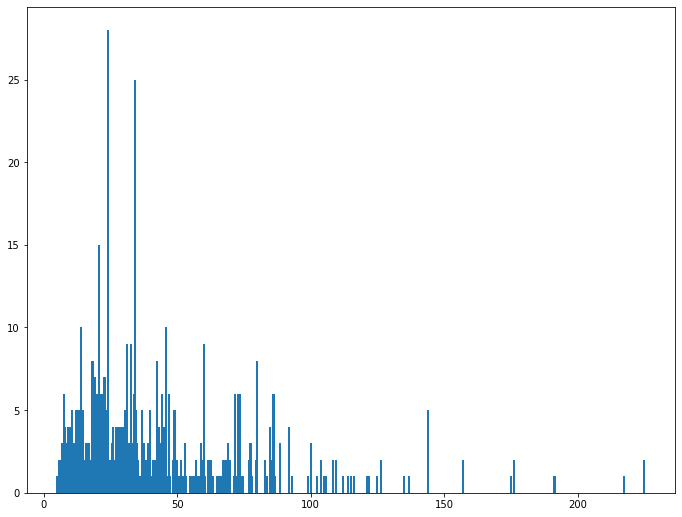

45.0    28
31.0    25
40.0    15
21.0    10
30.0    10
        ..
17.3     1
18.1     1
13.9     1
30.1     1
34.4     1
Name: price, Length: 377, dtype: int64

In [37]:
repartition_des_prix = df_bottleneck.price.value_counts()
prix = df_bottleneck.price.unique()
fig = plt.figure(figsize=(12,9))
ax = fig.add_axes([0.15,0.15,0.75,0.75])
ax.bar(prix, repartition_des_prix)

plt.show(fig)
repartition_des_prix

In [28]:
df_bottleneck

,product_id,onsale_web,price,stock_quantity,stock_status,id_web,sku,total_sales,tax_status,post_author,post_date,post_date_gmt,post_title,post_excerpt,post_status,post_name,post_modified,post_modified_gmt,guid,post_type,post_mime_type,turnover
0,3847,1,24.2,0,outofstock,15298,15298,6.0,taxable,2.0,2018-02-08 12:58:52,2018-02-08 11:58:52,Pierre Jean Villa Saint-Joseph Préface 2018,"Il exhale un nez subtil, racé avec du poivre f...",publish,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,145.2
1,3849,1,34.3,0,outofstock,15296,15296,0.0,taxable,2.0,2018-02-08 13:49:41,2018-02-08 12:49:41,Pierre Jean Villa Saint-Joseph Rouge Tildé 2017,Les vieilles vignes lui apportent une rare pro...,publish,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,0.0
2,3850,1,20.8,0,outofstock,15300,15300,0.0,taxable,2.0,2018-02-08 14:08:36,2018-02-08 13:08:36,Pierre Jean Villa Crozes-Hermitage Accroche Co...,"Dentelle de fruit de jeunes syrah, aux tanins ...",publish,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,0.0
3,4032,1,14.1,0,outofstock,19814,19814,3.0,taxable,2.0,2018-02-09 14:01:05,2018-02-09 13:01:05,Pierre Jean Villa IGP Collines Rhodaniennes Ga...,Gamine représente tout le fruité et la gourman...,publish,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,42.3
4,4039,1,46.0,0,outofstock,19815,19815,0.0,taxable,2.0,2018-02-12 09:04:37,2018-02-12 08:04:37,Pierre Jean Villa Côte Rôtie Carmina 2017,Le côte rôtie Carmina monte en puissance mais ...,publish,pierre-jean-villa-cote-rotie-carmina-2017,2020-01-04 16:36:10,2020-01-04 15:36:10,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
891,6930,1,8.4,83,instock,16135,16135,5.0,taxable,2.0,2020-04-25 13:22:38,2020-04-25 11:22:38,Mouthes Le Bihan Côtes de Duras L'Aimé Chai 2015,Belle robe jeune à dominante rubis soutenue. N...,publish,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,42.0
892,7023,1,27.5,15,instock,15891,15891,0.0,taxable,2.0,2020-05-02 14:53:40,2020-05-02 12:53:40,Camin Larredya Jurançon Sec La Virada 2018,L'exotisme du nez est complété par d'élégantes...,publish,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,0.0
893,7025,1,69.0,2,instock,15887,15887,0.0,taxable,2.0,2020-05-02 15:00:54,2020-05-02 13:00:54,Domaine Jamet Côte Rôtie Fructus Voluptas 2018,"Pour cette cuvée, Jean-Paul Jamet recherche un...",publish,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,0.0
894,7247,1,54.8,23,instock,13127-1,13127-1,0.0,taxable,2.0,2020-06-09 15:42:04,2020-06-09 13:42:04,Clos du Mont-Olivet Châteauneuf-du-Pape 2007,"Nez gracieux, très élégant avec une touche flo...",publish,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,https://www.bottle-neck.fr/?post_type=product&...,product,NaN,0.0
